In [1]:
from pathlib import Path
from collections import Counter
import shutil
import partitura as pt

dataset_path = Path("../data/jazzmus_dataset/")

In [2]:
print("Number of pieces in the dataset:")
len(list(dataset_path.glob("*.json")))

Number of pieces in the dataset:


293

In [3]:
songs = []
for piece_path in dataset_path.glob("*.json"):
    piece_name = piece_path.stem
    if "version" in piece_name:
        piece_name = piece_name.split("_version")[0]
    songs.append(piece_name)

unique_songs = Counter(songs)
print("Number of unique pieces in the dataset:", len(unique_songs))
# unique_songs

Number of unique pieces in the dataset: 163


In [63]:
# unique_songs

## Dataset statistics

### Different chords

In [5]:
all_chords = []
all_pieces = []
symbol_to_ignore = [".","=","*","**mxhm","*-", "==", "=:|!", "=||", "=!|:", "!", "=:|!|:" , "=||"]

unique_songs = [s for s in dataset_path.glob("*.krn") if ("version" not in s.name or "version_1.krn" in s.name)]
print("Number of unique pieces in the dataset:", len(unique_songs))
# unique_songs

for piece_path in unique_songs:
    # the kern file is made of 2 tab separated columns, read only the second column
    with open(piece_path, "r") as f:
        # read the second column
        for line in f:
            columns = line.strip().split("\t")
            if len(columns) ==2 :
                if columns[1]== "7" or columns[1] == "-7":
                    print("!!!!Warning",piece_path)
                    continue
                if "other" in columns[1]:
                    print("!!!!Strange other",piece_path)
                    continue
                if "none" in columns[1]:
                    print("!!!!Strange none",piece_path)
                if columns[1] not in symbol_to_ignore:
                    all_chords.append(columns[1])
                    all_pieces.append(piece_path.stem)

Counter(all_chords).most_common(10)

Number of unique pieces in the dataset: 163


[('C:7', 267),
 ('F:7', 258),
 ('G:7', 236),
 ('Bb:7', 221),
 ('D:7', 183),
 ('F:maj', 177),
 ('C:maj', 157),
 ('Bb:maj', 149),
 ('G:min7', 149),
 ('C:min7', 145)]

In [6]:
# Counter(all_chords)

In [7]:
# split root and chord type
roots = [c.split(":")[0] for c in all_chords]
bass = [c.split("/")[1] if "/" in c else "none" for c in all_chords]
chord_types = []
for c in all_chords:
    if len(c.split(":"))==1: # chord without any extension
        chord_types.append("none")
    else:
        chord_types.append(c.split(":")[1] if "/" not in c else c.split(":")[1].split("/")[0])
# elements between parentheses in chord_types are extensions modifiers
extensions_full = []
for c in chord_types:
    if "(" in c:
        extensions_full.append(c.split("(")[1].split(")")[0])
    else:
        extensions_full.append("none")
extensions_single = []
for ext in extensions_full:
    extensions_single.extend(ext.split(","))
# now remove extensions from chord_types
chord_types = [c.split("(")[0] if "(" in c else c for c in chord_types]



print("Bass", Counter(bass))
print("Roots", Counter(roots))
print("Chord types", Counter(chord_types))
print("Extensions full", Counter(extensions_full))
print("Extensions single", Counter(extensions_single))

Bass Counter({'none': 5602, 'F': 49, 'G': 47, 'Eb': 44, 'Bb': 34, 'A': 26, 'C': 22, 'D': 22, 'B': 22, 'E': 18, 'F#': 12, 'Ab': 5, 'Db': 5, 'D#': 4, 'Gb': 1})
Roots Counter({'C': 915, 'F': 866, 'Bb': 745, 'G': 741, 'D': 558, 'Eb': 549, 'A': 474, 'E': 285, 'Ab': 255, 'B': 192, 'Db': 157, 'F#': 58, 'Gb': 50, 'C#': 39, 'G#': 18, 'Cb': 7, 'D#': 2, 'Fb': 1, 'A#': 1})
Chord types Counter({'7': 2006, 'min7': 1008, 'maj': 915, 'maj7': 466, 'min': 465, '9': 198, 'maj6': 184, 'hdim7': 164, 'dim': 125, 'aug7': 76, 'min6': 60, '13': 57, 'dim7': 56, 'aug': 34, 'sus4': 28, 'min9': 28, 'none': 21, 'min11': 12, '11': 4, 'maj9': 4, 'minmaj7': 2})
Extensions full Counter({'none': 5557, 'b9': 123, 'b5': 88, '#9': 57, '#5': 19, '#11': 19, '7': 14, '9': 11, '7,9': 11, '#5,b9': 4, 'b5,#9': 4, '6,9': 2, '4,3': 1, '#7': 1, '5,b9,#9,#11,b13': 1, '7,13': 1})
Extensions single Counter({'none': 5557, 'b9': 128, 'b5': 92, '#9': 62, '7': 26, '9': 24, '#5': 23, '#11': 20, '6': 2, '4': 1, '3': 1, '#7': 1, '5': 1, 'b13

In [65]:
# Find which pieces contains the "none" chord type
none_chord_pieces = [p for p,c in zip(all_pieces,chord_types) if c=="none"]
print("Pieces with 'none' chord type:", Counter(none_chord_pieces))

# Find which pieces contains the "maj" chord type
maj_chord_pieces = [p for p,c in zip(all_pieces,chord_types) if c=="maj"]
print("Pieces with 'maj' chord type:", Counter(maj_chord_pieces))

Pieces with 'none' chord type: Counter({'blue-skies_version_1': 17, 'embraceable-you_version_1': 1, 'i-was-doing-all-right_version_1': 1, 'they-say-it-s-wonderful_version_1': 1, 'who-cares': 1})
Pieces with 'maj' chord type: Counter({'hymn-to-freedom': 41, 'white-christmas': 29, 'i-got-the-sun-in-the-morning': 25, 'cabaret': 23, 'hallelujah-i-love-her-so': 23, 'i-love-a-piano': 22, 'i-was-doing-all-right_version_1': 22, 'it-s-a-lovely-day-tomorrow': 22, 'easter-parade_version_1': 21, 'don-t-be-afraid-of-romance': 20, 'heat-wave': 19, 'count-your-blessings': 18, 'when-that-midnight-choo-choo-leaves-for-alabam': 16, 'artillerie-lourde': 15, 'belleville': 15, 'the-sweetheart-tree': 15, 'last-train-home': 14, 'the-girl-that-i-marry': 14, 'a-fella-with-an-umbrella': 13, 'clap-yo-hands': 13, 'embraceable-you_version_1': 13, 'god-bless-america': 13, 'in-a-mellow-tone_version_1': 13, 'oh-lady-be-good_version_1': 13, 'strike-up-the-band-': 13, 'swanee': 13, 'the-hills-of-yesterday': 13, 'a-pret

### Number of measures

Analysis, in total, considering multiple versions of the same piece

In [46]:
musicxml_paths = list(dataset_path.glob("*.musicxml"))

# kern_measures = [len(pt.load_score(str(kern_path))[-1].measures) for kern_path in unique_songs]
# print("Number of measures", Counter(kern_measures))

# remove all warnings
import warnings
warnings.filterwarnings("ignore")

# musicxml_paths = [k.parent/ Path(k.stem + ".musicxml") for k in unique_songs]
mxml_measures = [len(pt.load_score(str(mxml_path))[0].measures) for mxml_path in musicxml_paths]
print("Number of measures", Counter(mxml_measures))
    

Number of measures Counter({34: 84, 35: 36, 32: 31, 33: 23, 26: 19, 24: 7, 16: 6, 27: 6, 37: 5, 25: 5, 36: 5, 12: 5, 31: 5, 28: 5, 39: 4, 42: 4, 13: 4, 51: 4, 40: 4, 14: 3, 18: 3, 45: 3, 21: 2, 30: 2, 15: 2, 44: 2, 29: 2, 19: 2, 22: 1, 23: 1, 54: 1, 68: 1, 3: 1, 53: 1, 48: 1, 38: 1, 17: 1, 20: 1})


In [47]:
print(musicxml_paths)

[WindowsPath('../data/jazzmus_dataset/a-day-in-the-life-of-a-fool_version_1.musicxml'), WindowsPath('../data/jazzmus_dataset/a-day-in-the-life-of-a-fool_version_2.musicxml'), WindowsPath('../data/jazzmus_dataset/a-fella-with-an-umbrella.musicxml'), WindowsPath('../data/jazzmus_dataset/a-night-in-tunisia.musicxml'), WindowsPath('../data/jazzmus_dataset/a-pretty-girl-is-like-a-melody.musicxml'), WindowsPath('../data/jazzmus_dataset/ain-t-misbehavin_version_1.musicxml'), WindowsPath('../data/jazzmus_dataset/ain-t-misbehavin_version_10.musicxml'), WindowsPath('../data/jazzmus_dataset/ain-t-misbehavin_version_11.musicxml'), WindowsPath('../data/jazzmus_dataset/ain-t-misbehavin_version_12.musicxml'), WindowsPath('../data/jazzmus_dataset/ain-t-misbehavin_version_13.musicxml'), WindowsPath('../data/jazzmus_dataset/ain-t-misbehavin_version_2.musicxml'), WindowsPath('../data/jazzmus_dataset/ain-t-misbehavin_version_3.musicxml'), WindowsPath('../data/jazzmus_dataset/ain-t-misbehavin_version_4.mus

Number of musicxml measures Counter({34: 84, 35: 36, 32: 31, 33: 23, 26: 19, 24: 7, 16: 6, 27: 6, 37: 5, 25: 5, 36: 5, 12: 5, 31: 5, 28: 5, 39: 4, 42: 4, 13: 4, 51: 4, 40: 4, 14: 3, 18: 3, 45: 3, 21: 2, 30: 2, 15: 2, 44: 2, 29: 2, 19: 2, 22: 1, 23: 1, 54: 1, 68: 1, 3: 1, 53: 1, 48: 1, 38: 1, 17: 1, 20: 1})
Min-max 3 68
Low amount of measures:
..\data\jazzmus_dataset\blue-monk.musicxml 12
..\data\jazzmus_dataset\central-park-west.musicxml 12
..\data\jazzmus_dataset\donna-lee.musicxml 12
..\data\jazzmus_dataset\epistrophy.musicxml 3
..\data\jazzmus_dataset\mr-p-c.musicxml 12
..\data\jazzmus_dataset\sonnymoon-for-two.musicxml 12
High amount of measures:
..\data\jazzmus_dataset\cabaret.musicxml 54
..\data\jazzmus_dataset\charade.musicxml 68
..\data\jazzmus_dataset\last-train-home.musicxml 53
..\data\jazzmus_dataset\marie_version_1.musicxml 51
..\data\jazzmus_dataset\marie_version_2.musicxml 51
..\data\jazzmus_dataset\marie_version_3.musicxml 51
..\data\jazzmus_dataset\when-i-lost-you.music

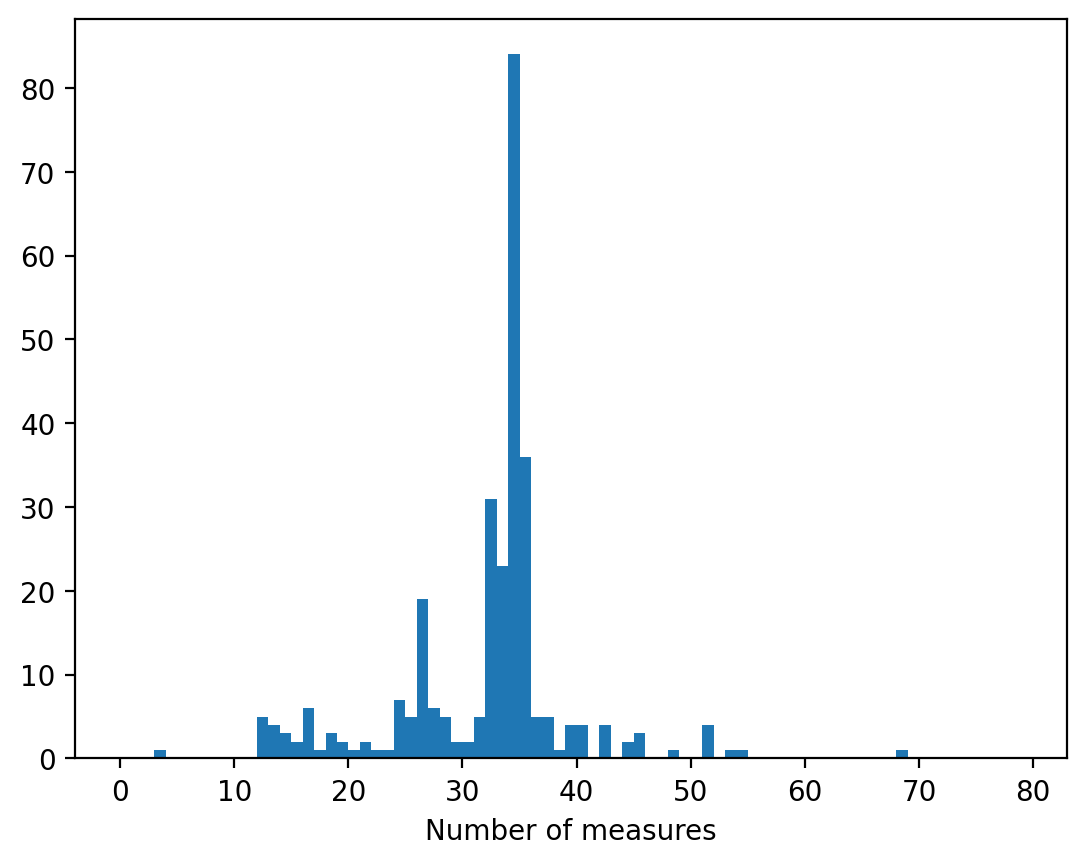

In [48]:
# print("Number of kern measures", Counter(kern_measures))
print("Number of musicxml measures", Counter(mxml_measures))

print("Min-max", min(mxml_measures), max(mxml_measures))
# plot histogram of number of measures
import matplotlib.pyplot as plt
plt.hist(mxml_measures, bins=range(0, 80, 1))
plt.xlabel("Number of measures")

print("Low amount of measures:")
# find which pieces have less than 15 measures
for mxml_path, mxml_measure in zip(musicxml_paths, mxml_measures):
    if mxml_measure < 13:
        print(mxml_path, mxml_measure)

print("High amount of measures:")
# find which pieces have more than 50 measures
for mxml_path, mxml_measure in zip(musicxml_paths, mxml_measures):
    if mxml_measure > 50:
        print(mxml_path, mxml_measure)

print("Average number of measures", sum(mxml_measures)/len(mxml_measures))

Analysis for the synthetic/ unique piece

In [62]:
musicxml_paths = [p for p in dataset_path.glob("*.musicxml") if "version" not in p.stem or "version_1.musicxml" in p.name] 

print("Number of unique pieces in the dataset:", len(musicxml_paths))

import warnings
warnings.filterwarnings("ignore")

# musicxml_paths = [k.parent/ Path(k.stem + ".musicxml") for k in unique_songs]
mxml_measures = [len(pt.load_score(str(mxml_path))[0].measures) for mxml_path in musicxml_paths]
print("Number of measures", Counter(mxml_measures))

print("Average number of measures for synthetic", sum(mxml_measures)/len(mxml_measures))



Number of unique pieces in the dataset: 163
Number of measures Counter({32: 23, 33: 20, 34: 19, 26: 8, 35: 8, 24: 7, 16: 6, 25: 5, 36: 5, 12: 5, 27: 5, 13: 4, 31: 4, 28: 4, 37: 3, 18: 3, 42: 3, 45: 3, 40: 3, 14: 2, 30: 2, 15: 2, 39: 2, 44: 2, 51: 2, 29: 2, 19: 2, 54: 1, 68: 1, 3: 1, 53: 1, 21: 1, 48: 1, 38: 1, 17: 1, 20: 1})
Average number of measures 30.257668711656443


### Regionwise analysis

Full dataset analysis

In [56]:
region_folder = Path(r"../data/jazzmus_dataset_regions/")

print("Number of regions in the dataset:", len(list(region_folder.glob("*.kern"))))

region_measures = [len(pt.load_score(str(region_path))[0].measures) for region_path in region_folder.glob("*.kern")]
print("Number of measures", Counter(region_measures))


# remove 293 from the total count due to the "extra measure at the end of the piece" partitura bug
print("Average number of measures", (sum(region_measures) - 293)/len(region_measures))

Number of regions in the dataset: 2021
Number of measures Counter({4: 931, 5: 502, 6: 179, 7: 145, 3: 130, 8: 55, 9: 31, 2: 21, 1: 21, 10: 4, 11: 1, 12: 1})
Average number of measures 4.58436417615042


Synthetic, or unique dataset analysis

In [59]:
unique_songs = [s for s in region_folder.glob("*.kern") if ("version" not in s.name or "version_1_" in s.name)]
print("Number of unique pieces in the dataset:", len(unique_songs))

region_measures = [len(pt.load_score(str(region_path))[0].measures) for region_path in unique_songs]
print("Number of measures", Counter(region_measures))

# remove 164 from the total count due to the "extra measure at the end of the piece" partitura bug
print("Average number of measures", (sum(region_measures) - 164)/len(region_measures))

Number of unique pieces in the dataset: 1104
Number of measures Counter({4: 578, 5: 255, 6: 107, 7: 49, 3: 48, 8: 23, 2: 14, 1: 14, 9: 10, 10: 4, 11: 1, 12: 1})
Average number of measures 4.466485507246377
